In [1]:
import sys, os; sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__) if '__file__' in globals() else os.getcwd(), '..')))
#import os; os.chdir(os.path.dirname(os.getcwd()))
from utils.model_loader import get_model_fits
import numpy as np
import pandas as pd
import re
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


/Users/augustarnstad/Documents/source_code/prior_paper/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = f"datasets/friedman"
results_dir = "results/regression/single_layer/tanh/friedman"
model_names = ["Dirichlet Horseshoe tanh", "Dirichlet Student T tanh", "Beta Horseshoe tanh", "Beta Student T tanh"]

fits = {}

files = sorted(f for f in os.listdir(data_dir) if f.endswith(".npz"))
for fname in files:
    base_config_name = fname.replace(".npz", "")  # e.g., "GAM_N100_p8_sigma1.00_seed1"
    full_config_path = f"{base_config_name}"  # → "type_1/GAM_N100_p8_sigma1.00_seed1"
    fit = get_model_fits(
        config=full_config_path,
        results_dir=results_dir,
        models=model_names,
        include_prior=False,
    )
    
    

    fits[base_config_name] = fit 

11:45:02 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 303 divergent transitions (30.3%)
	Chain 1 had 697 iterations at max treedepth (69.7%)
	Chain 2 had 460 divergent transitions (46.0%)
	Chain 2 had 540 iterations at max treedepth (54.0%)
	Chain 3 had 423 divergent transitions (42.3%)
	Chain 3 had 577 iterations at max treedepth (57.7%)
	Chain 4 had 442 divergent transitions (44.2%)
	Chain 4 had 558 iterations at max treedepth (55.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
11:45:03 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 391 divergent transitions (39.1%)
	Chain 1 had 609 iterations at max treedepth (60.9%)
	Chain 2 had 462 divergent transitions (46.2%)
	Chain 2 had 538 iterations at max treedepth (53.8%)
	Chain 3 had 342 divergent transitions (34.2%)
	Chain 3 had 658 iterations at max treedepth (65.8%)
	Chain 4 had 290 divergent transitions (29.0%)
	Chain 4 had 710 itera

In [3]:
data_dir_correlated = f"datasets/friedman_correlated"
results_dir_correlated = "results/regression/single_layer/tanh/friedman_correlated"
model_names_correlated = ["Dirichlet Horseshoe tanh", "Dirichlet Student T tanh", "Beta Horseshoe tanh", "Beta Student T tanh"]

fits_correlated = {}

files = sorted(f for f in os.listdir(data_dir_correlated) if f.endswith(".npz"))
for fname in files:
    base_config_name = fname.replace(".npz", "")  # e.g., "GAM_N100_p8_sigma1.00_seed1"
    full_config_path = f"{base_config_name}"  # → "type_1/GAM_N100_p8_sigma1.00_seed1"
    fit_correlated = get_model_fits(
        config=full_config_path,
        results_dir=results_dir_correlated,
        models=model_names_correlated,
        include_prior=False,
    )
    

    fits_correlated[base_config_name] = fit_correlated
    


11:45:12 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 229 divergent transitions (22.9%)
	Chain 1 had 771 iterations at max treedepth (77.1%)
	Chain 2 had 241 divergent transitions (24.1%)
	Chain 2 had 759 iterations at max treedepth (75.9%)
	Chain 3 had 259 divergent transitions (25.9%)
	Chain 3 had 741 iterations at max treedepth (74.1%)
	Chain 4 had 262 divergent transitions (26.2%)
	Chain 4 had 738 iterations at max treedepth (73.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
11:45:12 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 282 divergent transitions (28.2%)
	Chain 1 had 718 iterations at max treedepth (71.8%)
	Chain 2 had 269 divergent transitions (26.9%)
	Chain 2 had 731 iterations at max treedepth (73.1%)
	Chain 3 had 314 divergent transitions (31.4%)
	Chain 3 had 686 iterations at max treedepth (68.6%)
	Chain 4 had 366 divergent transitions (36.6%)
	Chain 4 had 634 itera

[WARNING] No files matched: results/regression/single_layer/tanh/friedman_correlated/dirichlet_horseshoe_tanh/U2/chain_*.csv
[WARNING] No files matched: results/regression/single_layer/tanh/friedman_correlated/dirichlet_student_t_tanh/U2/chain_*.csv
[WARNING] No files matched: results/regression/single_layer/tanh/friedman_correlated/beta_horseshoe_tanh/U2/chain_*.csv
[WARNING] No files matched: results/regression/single_layer/tanh/friedman_correlated/beta_student_t_tanh/U2/chain_*.csv


In [4]:
data_dir = f"datasets/abalone"
results_dir_relu = "results/regression/single_layer/relu/abalone"
results_dir_tanh = "results/regression/single_layer/tanh/abalone"

model_names_relu = ["Dirichlet Horseshoe", "Dirichlet Student T", "Beta Horseshoe", "Beta Student T"]
model_names_tanh = ["Dirichlet Horseshoe tanh", "Dirichlet Student T tanh", "Beta Horseshoe tanh", "Beta Student T tanh"]


full_config_path = "abalone_N3341_p8"
abalone_relu_fit = get_model_fits(
    config=full_config_path,
    results_dir=results_dir_relu,
    models=model_names_relu,
    include_prior=False,
)

abalone_tanh_fit = get_model_fits(
    config=full_config_path,
    results_dir=results_dir_tanh,
    models=model_names_tanh,
    include_prior=False,
)

11:45:23 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 iterations at max treedepth (100.0%)
	Chain 2 had 1000 iterations at max treedepth (100.0%)
	Chain 3 had 1000 iterations at max treedepth (100.0%)
	Chain 4 had 8 divergent transitions (0.8%)
	Chain 4 had 992 iterations at max treedepth (99.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
11:45:27 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 42 divergent transitions (4.2%)
	Chain 1 had 958 iterations at max treedepth (95.8%)
	Chain 2 had 94 divergent transitions (9.4%)
	Chain 2 had 906 iterations at max treedepth (90.6%)
	Chain 3 had 3 divergent transitions (0.3%)
	Chain 3 had 997 iterations at max treedepth (99.7%)
	Chain 4 had 76 divergent transitions (7.6%)
	Chain 4 had 924 iterations at max treedepth (92.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
11:45:31 - cmdstanpy - WARNING - 

In [5]:
import re
import numpy as np
import pandas as pd
from properscoring import crps_ensemble

_FRIEDMAN_KEY = re.compile(r"Friedman_N(\d+)_p\d+_sigma([\d.]+)_seed(\d+)")

def extract_friedman_metadata(key: str):
    """
    Parse 'Friedman_N{N}_p10_sigma{sigma}_seed{seed}' -> (N:int, sigma:float, seed:int)
    Returns (None, None, None) if it doesn't match.
    """
    m = _FRIEDMAN_KEY.search(key)
    if not m:
        return None, None, None
    N = int(m.group(1))
    sigma = float(m.group(2))
    seed = int(m.group(3))
    return N, sigma, seed


In [6]:
def compute_rmse_from_fits(all_fits, model_names=None, folder="friedman"):
    """
    Iterate over all dataset keys in `all_fits` (e.g., relu_fits or tanh_fits).
    For each model in `model_names` (or all models found if None), compute:
      - RMSE for each posterior draw
      - RMSE of the posterior mean predictor

    Returns:
        df_rmse: long DF with one row per posterior draw.
        df_posterior_rmse: one row per model/dataset with posterior-mean RMSE.
    """
    rmse_rows = []
    post_mean_rows = []

    for dataset_key, model_dict in all_fits.items():
        N, sigma, seed = extract_friedman_metadata(dataset_key)
        if N is None:
            # Skip non-Friedman entries if any
            continue

        
        try:
            path = f"datasets/{folder}/Friedman_N{N}_p10_sigma{sigma:.2f}_seed{seed}.npz"
            data = np.load(path)
            y_test = data["y_test"].squeeze()  # shape (N_test,)
        except FileNotFoundError:
            path = f"datasets/{folder}/many/Friedman_N{N}_p10_sigma{sigma:.2f}_seed{seed}.npz"
            data = np.load(path)
            y_test = data["y_test"].squeeze()  # shape (N_test,)
            #print(f"[SKIP] y_test not found: {path}")
            #continue

        # Choose which models to evaluate
        models_to_eval = model_names or list(model_dict.keys())

        for model in models_to_eval:
            # Some entries may be missing
            entry = model_dict.get(model, None)
            if not entry or "posterior" not in entry:
                print(f"[SKIP] Missing posterior: {dataset_key} -> {model}")
                continue

            fit = entry["posterior"]

            # Expecting (S, N_test, 1) or (S, N_test)
            output_test = fit.stan_variable("output_test")
            if output_test.ndim == 3 and output_test.shape[-1] == 1:
                preds = output_test[..., 0]  # (S, N_test)
            elif output_test.ndim == 2:
                preds = output_test  # (S, N_test)
            else:
                raise ValueError(f"Unexpected output_test shape {output_test.shape} for {dataset_key} -> {model}")

            # Per-sample RMSE
            sq_err = (preds - y_test[None, :])**2  # (S, N_test)
            rmse_per_sample = np.sqrt(np.mean(sq_err, axis=1))  # (S,)

            for s_idx, rmse in enumerate(rmse_per_sample):
                rmse_rows.append({
                    "dataset_key": dataset_key,
                    "model": model,
                    "N": N,
                    "sigma": sigma,
                    "seed": seed,
                    "sample_idx": s_idx,
                    "rmse": float(rmse)
                })

            # Posterior-mean RMSE
            posterior_mean = preds.mean(axis=0)  # (N_test,)
            post_mean_rmse = float(np.sqrt(np.mean((posterior_mean - y_test)**2)))
            post_mean_rows.append({
                "dataset_key": dataset_key,
                "model": model,
                "N": N,
                "sigma": sigma,
                "seed": seed,
                "posterior_mean_rmse": post_mean_rmse
            })

    df_rmse = pd.DataFrame(rmse_rows)
    df_posterior_rmse = pd.DataFrame(post_mean_rows)
    return df_rmse, df_posterior_rmse


def compute_crps_from_fits(all_fits, model_names=None):
    """
    Compute CRPS per dataset/model using all posterior predictive samples.

    Returns:
        df_crps: one row per dataset/model with mean CRPS.
    """
    rows = []

    for dataset_key, model_dict in all_fits.items():
        N, sigma, seed = extract_friedman_metadata(dataset_key)
        if N is None:
            continue

        path = f"datasets/friedman/Friedman_N{N}_p10_sigma{sigma:.2f}_seed{seed}.npz"
        try:
            data = np.load(path)
            y_test = data["y_test"].squeeze()  # (N_test,)
        except FileNotFoundError:
            print(f"[SKIP] y_test not found: {path}")
            continue

        models_to_eval = model_names or list(model_dict.keys())

        for model in models_to_eval:
            entry = model_dict.get(model, None)
            if not entry or "posterior" not in entry:
                print(f"[SKIP] Missing posterior: {dataset_key} -> {model}")
                continue

            fit = entry["posterior"]
            output_test = fit.stan_variable("output_test")

            # Expecting (S, N_test, 1) or (S, N_test)
            if output_test.ndim == 3 and output_test.shape[-1] == 1:
                preds = output_test[..., 0]  # (S, N_test)
            elif output_test.ndim == 2:
                preds = output_test  # (S, N_test)
            else:
                raise ValueError(f"Unexpected output_test shape {output_test.shape} for {dataset_key} -> {model}")

            # crps_ensemble expects shape (N_test, S)
            crps_point = crps_ensemble(y_test, preds.T)  # (N_test,)
            rows.append({
                "dataset_key": dataset_key,
                "model": model,
                "N": N,
                "sigma": sigma,
                "seed": seed,
                "crps": float(crps_point.mean())
            })

    df_crps = pd.DataFrame(rows)
    return df_crps


In [7]:
# Evaluate models
df_rmse, df_posterior_rmse = compute_rmse_from_fits(
    fits, model_names
)

df_rmse_correlated, df_posterior_rmse_correlated = compute_rmse_from_fits(
    fits_correlated, model_names_correlated, folder="Friedman_correlated"  
)



In [8]:
summary = df_rmse.groupby(["model", "N"]).agg(
    acc_mean=("rmse", "mean"),
    acc_std=("rmse", "std"),
    #nll_mean=("nll", "mean"),
    #nll_std=("nll", "std"),
).reset_index()

summary_correlated = df_rmse_correlated.groupby(["model", "N"]).agg(
    acc_mean=("rmse", "mean"),
    acc_std=("rmse", "std"),
    #nll_mean=("nll", "mean"),
    #nll_std=("nll", "std"),
).reset_index()


print(summary.to_latex(index=False, float_format="%.3f"))
print(summary_correlated.to_latex(index=False, float_format="%.3f"))
# print(summary_tanh_correlated.to_latex(index=False, float_format="%.3f"))


\begin{tabular}{lrrr}
\toprule
model & N & acc_mean & acc_std \\
\midrule
Beta Horseshoe tanh & 100 & 0.370 & 0.060 \\
Beta Horseshoe tanh & 200 & 0.225 & 0.018 \\
Beta Horseshoe tanh & 500 & 0.198 & 0.008 \\
Beta Student T tanh & 100 & 0.375 & 0.059 \\
Beta Student T tanh & 200 & 0.226 & 0.019 \\
Beta Student T tanh & 500 & 0.199 & 0.009 \\
Dirichlet Horseshoe tanh & 100 & 0.357 & 0.058 \\
Dirichlet Horseshoe tanh & 200 & 0.223 & 0.018 \\
Dirichlet Horseshoe tanh & 500 & 0.198 & 0.008 \\
Dirichlet Student T tanh & 100 & 0.358 & 0.059 \\
Dirichlet Student T tanh & 200 & 0.225 & 0.019 \\
Dirichlet Student T tanh & 500 & 0.199 & 0.009 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
model & N & acc_mean & acc_std \\
\midrule
Beta Horseshoe tanh & 100 & 0.525 & 0.072 \\
Beta Horseshoe tanh & 200 & 0.278 & 0.027 \\
Beta Horseshoe tanh & 500 & 0.239 & 0.013 \\
Beta Student T tanh & 100 & 0.525 & 0.070 \\
Beta Student T tanh & 200 & 0.278 & 0.027 \\
Beta Student T tanh & 500 & 0.

In [9]:
import pandas as pd

df1 = df_rmse.assign(activation="local", setting="Original")
df2 = df_rmse_correlated.assign(activation="local", setting="Correlated")
dfpm = df_posterior_rmse.assign(activation="local", setting="Original")
dfpm_correlated = df_posterior_rmse_correlated.assign(activation="local", setting="Correlated")

df_all = pd.concat([df1, df2], ignore_index=True)
df_pm_all = pd.concat([dfpm, dfpm_correlated], ignore_index=True)


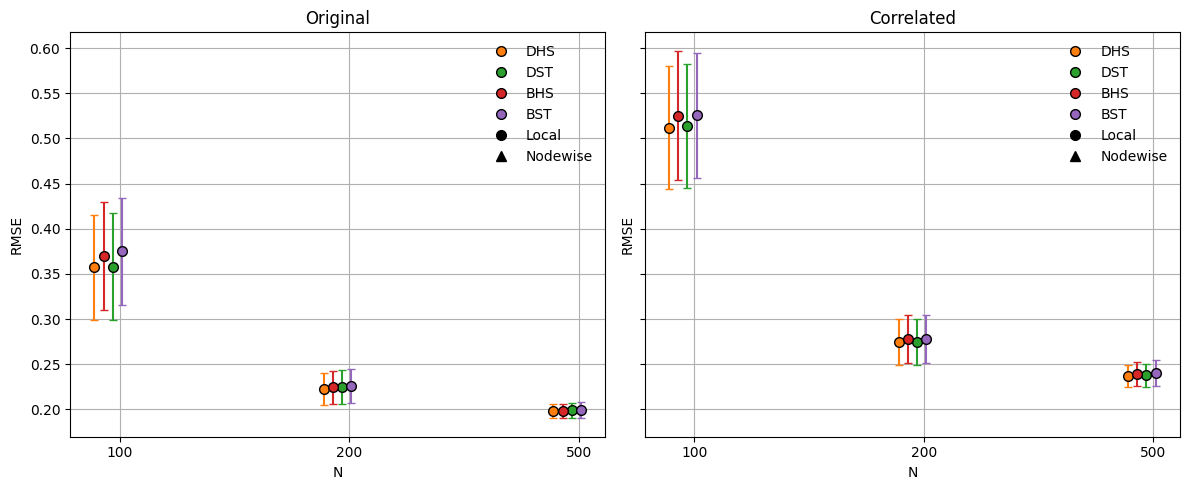

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- prepare data ---
df = df_all.copy()

abbr = {
    "Dirichlet Horseshoe": "DHS",
    "Dirichlet Student T": "DST",
    "Beta Horseshoe": "BHS",
    "Beta Student T": "BST",
}

# unify model names across activations (strip " tanh")
df["model_clean"] = df["model"].str.replace(" tanh", "", regex=False)
#df["model_clean"] = df["model_clean"].str.replace(" nodewise", "", regex=False)
# summary stats per (setting, N, model, activation)
summary = (
    df.groupby(["setting", "N", "model_clean", "activation"], as_index=False)["rmse"]
      .agg(mean="mean", std="std")
)

# plotting order
settings = ["Original", "Correlated"]
Ns = [100, 200, 500]
models = ["Dirichlet Horseshoe", "Dirichlet Student T", "Beta Horseshoe", "Beta Student T"]

# visuals
markers = {"local": "o", "nodewise": "^"}            # shapes
offsets = {"local": -0.05, "nodewise": +0.05}        # side-by-side jitter on x
model_offsets = {
    "Dirichlet Horseshoe": -0.06,
    "Beta Horseshoe": -0.02,
    "Dirichlet Student T": +0.02,
    "Beta Student T": +0.06,
}
palette_list = plt.get_cmap("tab10").colors
palette = {m: palette_list[i+1] for i, m in enumerate(models)}

# map N to base x positions and add offsets for activation
xbase = {N: i for i, N in enumerate(Ns)}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, setting in zip(axes, settings):
    sub = summary[summary["setting"] == setting]
    # plot each model+activation with errorbars, without lines
    for m in models:
        for act in ["local", "nodewise"]:
            g = sub[(sub["model_clean"] == m) & (sub["activation"] == act)]
            if g.empty:
                continue
            #xs = [xbase[n] + offsets[act] for n in g["N"]]
            xs = [xbase[n] + offsets[act] + model_offsets[m] for n in g["N"]]

            ax.errorbar(
                xs, g["mean"], yerr=g["std"],
                fmt=markers[act], markersize=7,
                linestyle="none", capsize=3,
                color=palette[m], markeredgecolor="black"
            )

    ax.set_title(f"{setting}")
    ax.set_xticks(range(len(Ns)))
    ax.set_xticklabels(Ns)
    ax.set_xlabel("N")
    ax.set_ylabel("RMSE")
    ax.grid()

# --- legends ---
model_handles = [
    Line2D(
        [0], [0],
        marker="o",
        linestyle="none",
        color=palette[m],
        markeredgecolor="black",
        markersize=7,
        label=abbr.get(m, m)   # <- use abbreviation
    )
    for m in models
]

# activation legend (shapes)
activation_handles = [
    Line2D([0], [0], marker=markers["local"], linestyle="none", color="black",
           markersize=7, label="Local"),
    Line2D([0], [0], marker=markers["nodewise"], linestyle="none", color="black",
           markersize=7, label="Nodewise"),
]

for ax in axes:
    ax.legend(
        handles=model_handles + activation_handles,
        title=None,
        loc="upper right",
        frameon=False,
        ncol=1
    )
plt.tight_layout(rect=(0, 0, 1, 1))
#plt.grid()
plt.show()

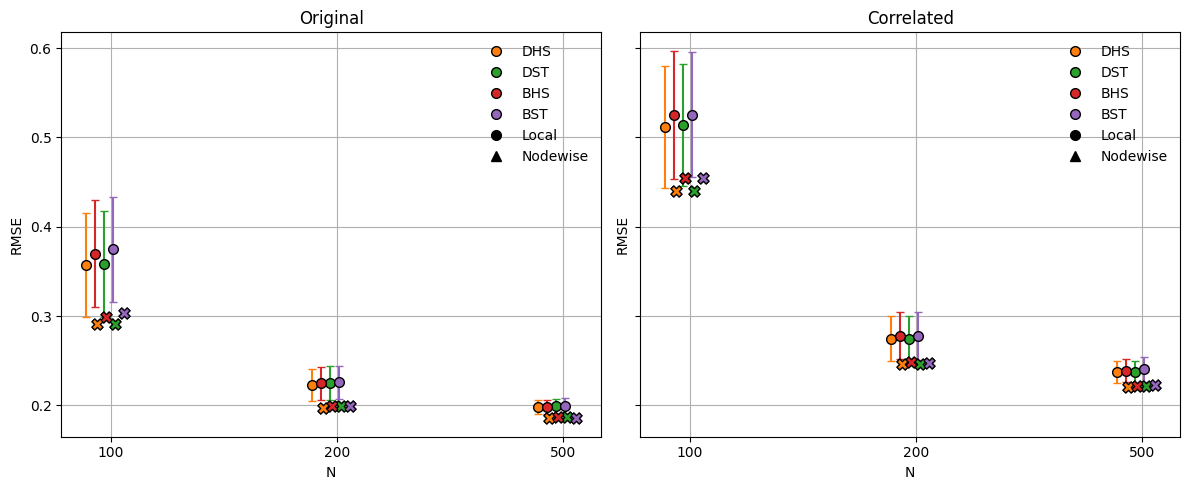

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- prepare data ---
df = df_all.copy()
# --- posterior mean RMSE df (rename for clarity) ---
df_pm = df_pm_all.copy()

# make model names consistent with your plotting code
df_pm["model_clean"] = df_pm["model"].str.replace(" tanh", "", regex=False)

# aggregate if multiple seeds per (setting,N,model); otherwise it’s already unique
pm_summary = (
    df_pm.groupby(["setting", "N", "model_clean"], as_index=False)["posterior_mean_rmse"]
        .mean()
)

abbr = {
    "Dirichlet Horseshoe": "DHS",
    "Dirichlet Student T": "DST",
    "Beta Horseshoe": "BHS",
    "Beta Student T": "BST",
}

# unify model names across activations (strip " tanh")
df["model_clean"] = df["model"].str.replace(" tanh", "", regex=False)
#df["model_clean"] = df["model_clean"].str.replace(" nodewise", "", regex=False)
# summary stats per (setting, N, model, activation)
summary = (
    df.groupby(["setting", "N", "model_clean", "activation"], as_index=False)["rmse"]
      .agg(mean="mean", std="std")
)

# plotting order
settings = ["Original", "Correlated"]
Ns = [100, 200, 500]
models = ["Dirichlet Horseshoe", "Dirichlet Student T", "Beta Horseshoe", "Beta Student T"]

# visuals
markers = {"local": "o", "nodewise": "^"}            # shapes
offsets = {"local": -0.05, "nodewise": +0.05}        # side-by-side jitter on x
model_offsets = {
    "Dirichlet Horseshoe": -0.06,
    "Beta Horseshoe": -0.02,
    "Dirichlet Student T": +0.02,
    "Beta Student T": +0.06,
}
palette_list = plt.get_cmap("tab10").colors
palette = {m: palette_list[i+1] for i, m in enumerate(models)}

# map N to base x positions and add offsets for activation
xbase = {N: i for i, N in enumerate(Ns)}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, setting in zip(axes, settings):
    sub = summary[summary["setting"] == setting]
    # plot each model+activation with errorbars, without lines
    for m in models:
        for act in ["local", "nodewise"]:
            g = sub[(sub["model_clean"] == m) & (sub["activation"] == act)]
            if g.empty:
                continue
            #xs = [xbase[n] + offsets[act] for n in g["N"]]
            xs = [xbase[n] + offsets[act] + model_offsets[m] for n in g["N"]]

            ax.errorbar(
                xs, g["mean"], yerr=g["std"],
                fmt=markers[act], markersize=7,
                linestyle="none", capsize=3,
                color=palette[m], markeredgecolor="black"
            )
            # --- overlay posterior-mean network RMSE (single-marker, no errorbar) ---
            pm_sub = pm_summary[pm_summary["setting"] == setting]

            for m in models:
                gpm = pm_sub[pm_sub["model_clean"] == m]
                if gpm.empty:
                    continue

                xs_pm = [xbase[n] + model_offsets[m] for n in gpm["N"]]  # centered (no activation offset)

                ax.scatter(
                    xs_pm, gpm["posterior_mean_rmse"],
                    marker="X", s=60,
                    color=palette[m], edgecolors="black", linewidths=0.8,
                    zorder=5
                )


    ax.set_title(f"{setting}")
    ax.set_xticks(range(len(Ns)))
    ax.set_xticklabels(Ns)
    ax.set_xlabel("N")
    ax.set_ylabel("RMSE")
    ax.grid()

# --- legends ---
model_handles = [
    Line2D(
        [0], [0],
        marker="o",
        linestyle="none",
        color=palette[m],
        markeredgecolor="black",
        markersize=7,
        label=abbr.get(m, m)   # <- use abbreviation
    )
    for m in models
]

# activation legend (shapes)
activation_handles = [
    Line2D([0], [0], marker=markers["local"], linestyle="none", color="black",
           markersize=7, label="Local"),
    Line2D([0], [0], marker=markers["nodewise"], linestyle="none", color="black",
           markersize=7, label="Nodewise"),
]

for ax in axes:
    ax.legend(
        handles=model_handles + activation_handles,
        title=None,
        loc="upper right",
        frameon=False,
        ncol=1
    )
plt.tight_layout(rect=(0, 0, 1, 1))
#plt.grid()
plt.show()

## SPARSITY

In [12]:
from utils.sparsity import forward_pass_relu, forward_pass_tanh, local_prune_weights

def compute_sparse_rmse_results(seeds, models, all_fits, get_N_sigma, forward_pass, folder,
                         sparsity=0.0, prune_fn=None):
    results = []
    posterior_means = []

    for seed in seeds:
        N, sigma = get_N_sigma(seed)
        dataset_key = f'Friedman_N{N}_p10_sigma{sigma:.2f}_seed{seed}'
        path = f"datasets/{folder}/{dataset_key}.npz"

        try:
            data = np.load(path)
            X_test, y_test = data["X_test"], data["y_test"]
        except FileNotFoundError:
            print(f"[SKIP] File not found: {path}")
            continue

        for model in models:
            try:
                fit = all_fits[dataset_key][model]['posterior']
                W1_samples = fit.stan_variable("W_1")           # (S, P, H)
                W2_samples = fit.stan_variable("W_L")           # (S, H, O)
                b1_samples = fit.stan_variable("hidden_bias")   # (S, O, H)
                b2_samples = fit.stan_variable("output_bias")   # (S, O)
            except KeyError:
                print(f"[SKIP] Model or posterior not found: {dataset_key} -> {model}")
                continue

            S = W1_samples.shape[0]
            rmses = np.zeros(S)
            #print(y_test.shape)
            y_hats = np.zeros((S, y_test.shape[0]))

            for i in range(S):
                W1 = W1_samples[i]
                W2 = W2_samples[i]

                # Apply pruning mask if requested
                if prune_fn is not None and sparsity > 0.0:
                    masks = prune_fn([W1, W2], sparsity)
                    W1 = W1 * masks[0]
                    #W2 = W2 * masks[1]

                y_hat = forward_pass(X_test, W1, b1_samples[i][0], W2, b2_samples[i])
                y_hats[i] = y_hat.squeeze()  # Store the prediction for each sample
                rmses[i] = np.sqrt(np.mean((y_hat.squeeze() - y_test)**2))
                
            posterior_mean = np.mean(y_hats, axis=0)
            posterior_mean_rmse = np.sqrt(np.mean((posterior_mean - y_test.squeeze())**2))

            posterior_means.append({
                'seed': seed,
                'N': N,
                'sigma': sigma,
                'model': model,
                'sparsity': sparsity,
                'posterior_mean_rmse': posterior_mean_rmse
            })

            for i in range(S):
                results.append({
                    'seed': seed,
                    'N': N,
                    'sigma': sigma,
                    'model': model,
                    'sparsity': sparsity,
                    'rmse': rmses[i]
                })

    df_rmse = pd.DataFrame(results)
    df_posterior_rmse = pd.DataFrame(posterior_means)

    return df_rmse, df_posterior_rmse


sparsity_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

seeds = [1, 2, 11]
seeds_correlated = [1, 6, 11]

def get_N_sigma(seed):
    if seed == 1:
        N=100
    elif seed == 2:
        N=200
    else:
        N=500
    sigma=1.00
    return N, sigma

def get_N_sigma_correlated(seed):
    if seed == 1:
        N=100
    elif seed == 6:
        N=200
    else:
        N=500
    sigma=1.00
    return N, sigma

In [13]:
df_rmse_sparse, df_posterior_rmse_sparse = {}, {}
df_rmse_sparse_correlated, df_posterior_rmse_sparse_correlated = {}, {}

for sparsity in sparsity_levels:
    df_rmse_sparse[sparsity], df_posterior_rmse_sparse[sparsity] = compute_sparse_rmse_results(
        seeds, model_names, fits, get_N_sigma, forward_pass_tanh, folder = "friedman",
        sparsity=sparsity, prune_fn=local_prune_weights
    )
    
    df_rmse_sparse_correlated[sparsity], df_posterior_rmse_sparse_correlated[sparsity] = compute_sparse_rmse_results(
        seeds_correlated, model_names_correlated, fits_correlated, get_N_sigma_correlated, forward_pass_tanh, folder = "friedman_correlated",
        sparsity=sparsity, prune_fn=local_prune_weights
    )
    

In [14]:
import pandas as pd

df_rmse_full = pd.concat(
    [df.assign(sparsity=sparsity) for sparsity, df in df_rmse_sparse.items()],
    ignore_index=True
)

df_rmse_full_correlated = pd.concat(
    [df.assign(sparsity=sparsity) for sparsity, df in df_rmse_sparse_correlated.items()],
    ignore_index=True
)


df_local_o = df_rmse_full.copy()
df_local_o["model"] = df_local_o["model"].str.replace(" tanh", "", regex=False)

df_local_c = df_rmse_full_correlated.copy()
df_local_c["model"] = df_local_c["model"].str.replace(" tanh", "", regex=False)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import pandas as pd
from collections import OrderedDict

# --- Your palettes and abbreviations ---
palette = {
    "Dirichlet Horseshoe": "C0",
    "Dirichlet Student T": "C1",
    "Beta Horseshoe": "C2",
    "Beta Student T": "C3",
}

def make_merged_df(
    df_local_o, df_local_c,
    drop_tanh_suffix=True
):
    """Return one long df with columns: N, sparsity, rmse, model, activation, setting."""
    dfs = []
    for df, setting in [(df_local_o, "Original"), (df_local_c, "Correlated")]:
        d = df.copy()
        if drop_tanh_suffix and " tanh" in "".join(d["model"].unique()):
            d["model"] = d["model"].str.replace(" tanh", "", regex=False)
        d["activation"] = "Tanh"
        d["setting"] = setting
        dfs.append(d)
    out = pd.concat(dfs, ignore_index=True)

    # Keep only models that exist in BOTH activations so legend doesn't show ghosts
    models_local = set(out.loc[out.activation=="Tanh","model"].unique())
    if models_local:
        out = out[out["model"].isin(models_local)]
    return out

df_all = make_merged_df(df_local_o, df_local_c)


In [16]:
def plot_rmse_one_figure(
    df_all,
    Ns=(100, 200, 500),
    figsize=(12, 7),
    title="Original vs Correlated"
):
    # Orderings
    setting_order = ["Original", "Correlated"]

    sns.set_style("whitegrid")
    plt.rcParams.update({
        "axes.spines.top": False,
        "axes.spines.right": False,
        "legend.frameon": True,
    })

    fig, axes = plt.subplots(2, len(Ns), figsize=figsize, sharex=True, sharey="col")
    if len(Ns) == 1:
        axes = axes.reshape(2, 1)

    for j, Nval in enumerate(Ns):
        for i, setting in enumerate(setting_order):
            ax = axes[i, j]
            dfN = df_all[(df_all["N"] == Nval) & (df_all["setting"] == setting)].copy()

            # If empty, hide this subplot
            if dfN.empty:
                ax.set_visible(False)
                continue

            # Abbreviated labels for models
            dfN["model_abbr"] = dfN["model"].map(lambda m: abbr.get(m, m))

            # Build a palette keyed by the *abbreviated* model names
            color_map = {
                abbr[m]: palette[m]
                for m in dfN["model"].unique()
                if m in palette
            }

            hue_order = [
                abbr[m]
                for m in sorted(
                    dfN["model"].unique(),
                    key=lambda x: list(palette).index(x) if x in palette else 999
                )
            ]

            sns.lineplot(
                data=dfN,
                x="sparsity",
                y="rmse",
                hue="model_abbr",       # color = prior (abbr)
                markers=True,
                dashes=True,           # single activation, keep lines simple
                palette=color_map,
                hue_order=hue_order,
                errorbar=None,
                ax=ax,
            )

            ax.set_title(f"N={Nval}", fontweight="normal")
            ax.set_xlabel("Sparsity")
            ax.set_ylabel("RMSE" if j == 0 else "")
            ax.grid(True, which="major", alpha=0.25)

            # Remove per-axes legends; we’ll add one global legend
            if ax.legend_:
                ax.legend_.remove()

    # ---------- Global legend for priors (colors) ----------
    models_present = []
    for m in ["Dirichlet Horseshoe", "Dirichlet Student T",
              "Beta Horseshoe", "Beta Student T"]:
        if (df_all["model"] == m).any():
            models_present.append(m)

    prior_handles = [
        Line2D(
            [0], [0],
            color=palette[m],
            marker="o",
            linestyle="-",
            linewidth=2,
            markersize=7
        )
        for m in models_present
    ]
    prior_labels = [abbr[m] for m in models_present]

    if prior_handles:
        fig.legend(
            prior_handles,
            prior_labels,
            title="Prior",
            loc="upper center",
            ncol=len(prior_handles),
            frameon=True,
            bbox_to_anchor=(0.5, 1.02),
        )

    fig.suptitle(title, y=1.05)
    plt.tight_layout(rect=[0.02, 0.02, 0.98, 0.96])
    plt.show()


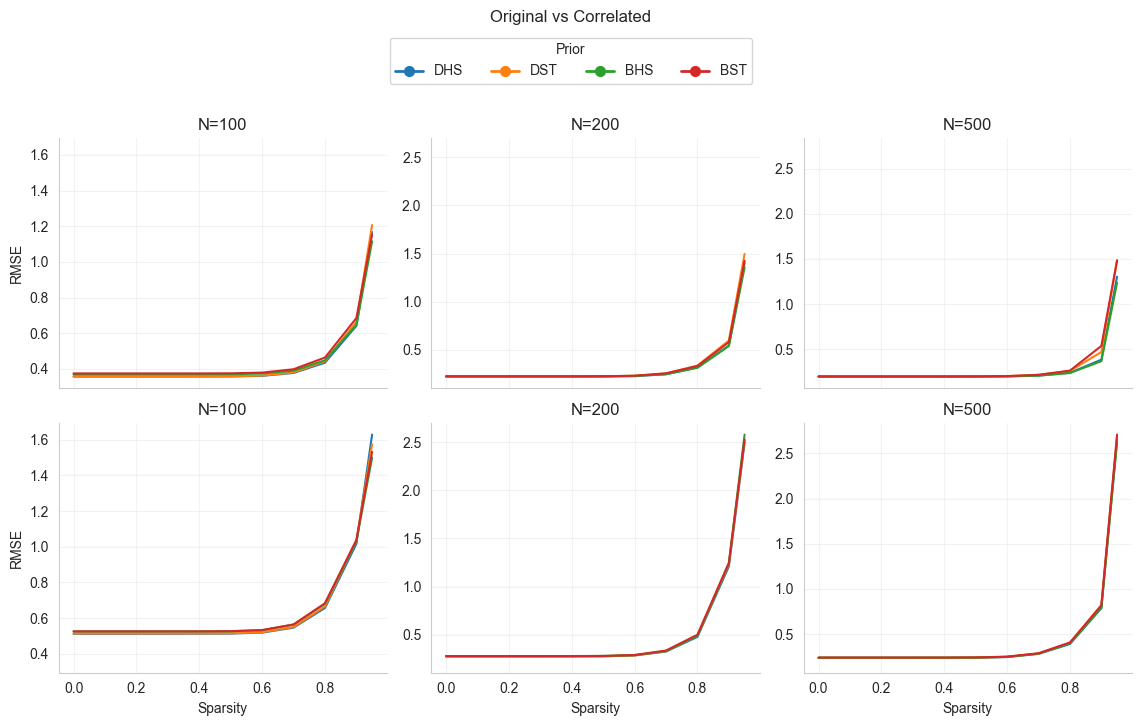

In [17]:

plot_rmse_one_figure(df_all,
                     Ns=(100, 200, 500),
                     title="Original vs Correlated")


## ABALONE

In [18]:
from sklearn.metrics import mean_squared_error
from properscoring import crps_ensemble
import numpy as np
import pandas as pd

# IMPORTANT: this y_test must correspond to the same test set used to make `output_test` in Stan,
# otherwise scores won’t be comparable.
from utils.generate_data import load_abalone_regression_data
X_train, X_test, y_train, y_test = load_abalone_regression_data(standardized=False, frac=1.0)

rows = []
for model_name, model_entry in abalone_relu_fit.items():
    post = model_entry["posterior"]

    # (S, n_test)
    y_samps = post.stan_variable("output_test").squeeze(-1)

    # Optional: limit to first S draws if desired
    # S = min(4000, y_samps.shape[0])
    # y_samps = y_samps[:S]

    # Posterior-mean predictions and RMSE
    y_mean = y_samps.mean(axis=0)                                   # (n_test,)
    rmse_post_mean = float(np.sqrt(mean_squared_error(y_test, y_mean)))

    # Per-draw RMSEs and their mean
    per_draw_rmse = np.sqrt(((y_samps - y_test[None, :])**2).mean(axis=1))  # (S,)
    rmse_draw_mean = float(per_draw_rmse.mean())

    # CRPS across the ensemble (expects shape (n_test, S))
    crps = float(np.mean(crps_ensemble(y_test, y_samps.T)))

    rows.append({
        "Model": model_name,
        "RMSE_posterior_mean": rmse_post_mean,
        "RMSE_mean_over_draws": rmse_draw_mean,
        "CRPS": crps,
        "n_draws": y_samps.shape[0]
    })

results_df = pd.DataFrame(rows).sort_values("RMSE_posterior_mean")
print(results_df)


                 Model  RMSE_posterior_mean  RMSE_mean_over_draws      CRPS  \
2       Beta Horseshoe             2.069869              2.085157  1.315439   
0  Dirichlet Horseshoe             2.070038              2.084659  1.314422   
3       Beta Student T             2.071078              2.086248  1.313994   
1  Dirichlet Student T             2.071393              2.086304  1.314722   

   n_draws  
2     4000  
0     4000  
3     4000  
1     4000  


In [19]:
from sklearn.metrics import mean_squared_error
from properscoring import crps_ensemble
import numpy as np
import pandas as pd

# IMPORTANT: this y_test must correspond to the same test set used to make `output_test` in Stan,
# otherwise scores won’t be comparable.
from utils.generate_data import load_abalone_regression_data
X_train, X_test, y_train, y_test = load_abalone_regression_data(standardized=False, frac=1.0)

rows = []
for model_name, model_entry in abalone_tanh_fit.items():
    post = model_entry["posterior"]

    # (S, n_test)
    y_samps = post.stan_variable("output_test").squeeze(-1)

    y_mean = y_samps.mean(axis=0)                                   # (n_test,)
    rmse_post_mean = float(np.sqrt(mean_squared_error(y_test, y_mean)))

    # Per-draw RMSEs and their mean
    per_draw_rmse = np.sqrt(((y_samps - y_test[None, :])**2).mean(axis=1))  # (S,)
    rmse_draw_mean = float(per_draw_rmse.mean())

    # CRPS across the ensemble (expects shape (n_test, S))
    crps = float(np.mean(crps_ensemble(y_test, y_samps.T)))

    rows.append({
        "Model": model_name,
        "RMSE_posterior_mean": rmse_post_mean,
        "RMSE_mean_over_draws": rmse_draw_mean,
        "CRPS": crps,
        "n_draws": y_samps.shape[0]
    })

results_df = pd.DataFrame(rows).sort_values("RMSE_posterior_mean")
print(results_df)


                      Model  RMSE_posterior_mean  RMSE_mean_over_draws  \
2       Beta Horseshoe tanh             1.953549              1.972678   
3       Beta Student T tanh             1.956194              1.965807   
0  Dirichlet Horseshoe tanh             1.960887              1.968731   
1  Dirichlet Student T tanh             1.961612              1.969294   

       CRPS  n_draws  
2  1.274750     4000  
3  1.297055     4000  
0  1.302301     4000  
1  1.303257     4000  


In [20]:
from utils.generate_data import load_abalone_regression_data
def compute_sparse_rmse_results_abalone(models, all_fits, forward_pass,
                         sparsity=0.0, prune_fn=None):
    results = []
    posterior_means = []
    for model in models:
        try:
            fit = all_fits[model]['posterior']
            W1_samples = fit.stan_variable("W_1")           # (S, P, H)
            W2_samples = fit.stan_variable("W_L")           # (S, H, O)
            b1_samples = fit.stan_variable("hidden_bias")   # (S, O, H)
            b2_samples = fit.stan_variable("output_bias")   # (S, O)
        except KeyError:
            print(f"[SKIP] Model or posterior not found:")
            continue

        S = W1_samples.shape[0]
        rmses = np.zeros(S)
        #print(y_test.shape)
        _, X_test, _, y_test = load_abalone_regression_data(standardized=False, frac=1.0)
        y_hats = np.zeros((S, y_test.shape[0]))

        for i in range(S):
            W1 = W1_samples[i]
            W2 = W2_samples[i]

            # Apply pruning mask if requested
            if prune_fn is not None and sparsity > 0.0:
                masks = prune_fn([W1, W2], sparsity)
                W1 = W1 * masks[0]
                #W2 = W2 * masks[1]

            y_hat = forward_pass(X_test, W1, b1_samples[i][0], W2, b2_samples[i])
            y_hats[i] = y_hat.squeeze()  # Store the prediction for each sample
            rmses[i] = np.sqrt(np.mean((y_hat.squeeze() - y_test)**2))
            
        posterior_mean = np.mean(y_hats, axis=0)
        posterior_mean_rmse = np.sqrt(np.mean((posterior_mean - y_test.squeeze())**2))

        posterior_means.append({
            'model': model,
            'sparsity': sparsity,
            'posterior_mean_rmse': posterior_mean_rmse
        })

        for i in range(S):
            results.append({
                'model': model,
                'sparsity': sparsity,
                'rmse': rmses[i]
            })

    df_rmse = pd.DataFrame(results)
    df_posterior_rmse = pd.DataFrame(posterior_means)

    return df_rmse, df_posterior_rmse


In [21]:
from utils.sparsity import forward_pass_relu, forward_pass_tanh, local_prune_weights

sparsity_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

df_rmse_relu, df_posterior_rmse_relu = {}, {}
df_rmse_tanh, df_posterior_rmse_tanh = {}, {}

for sparsity in sparsity_levels:
    df_rmse_relu[sparsity], df_posterior_rmse_relu[sparsity] = compute_sparse_rmse_results_abalone(
        models = model_names_relu,
        all_fits = abalone_relu_fit, 
        forward_pass = forward_pass_relu,
        sparsity=sparsity, 
        prune_fn=local_prune_weights
    )

    df_rmse_tanh[sparsity], df_posterior_rmse_tanh[sparsity] = compute_sparse_rmse_results_abalone(
        models = model_names_tanh,
        all_fits = abalone_tanh_fit, 
        forward_pass = forward_pass_tanh,
        sparsity=sparsity, 
        prune_fn=local_prune_weights
    )


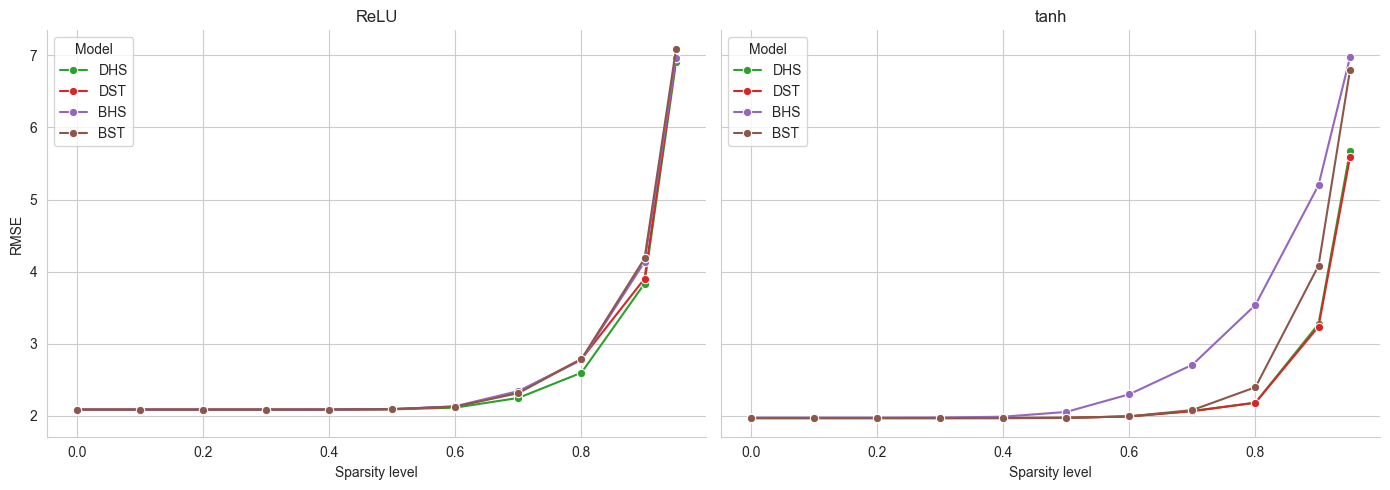

In [22]:
# Combine
df_rmse_full_relu = pd.concat(
    [df.assign(sparsity=sparsity) for sparsity, df in df_rmse_relu.items()],
    ignore_index=True
)

df_rmse_full_tanh = pd.concat(
    [df.assign(sparsity=sparsity) for sparsity, df in df_rmse_tanh.items()],
    ignore_index=True
)

# Plot (simplified version)
import matplotlib.pyplot as plt
import seaborn as sns
custom_palette = {
    "Dirichlet Horseshoe": "C2",
    "Dirichlet Student T": "C3",
    "Beta Horseshoe": "C4",
    "Beta Student T": "C5",
}
abbr = {
    "Dirichlet Horseshoe": "DHS",
    "Dirichlet Student T": "DST",
    "Beta Horseshoe": "BHS",
    "Beta Student T": "BST",
    #"Pred CP": "PCP"
}
# Clean names
df_rmse_full_relu["model"] = df_rmse_full_relu["model"].str.replace(" tanh", "", regex=False)
df_rmse_full_tanh["model"] = df_rmse_full_tanh["model"].str.replace(" tanh", "", regex=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)
activation_data = [("ReLU", df_rmse_full_relu), ("tanh", df_rmse_full_tanh)]

for ax, (name, df) in zip(axes, activation_data):
    df["model_abbr"] = df["model"].map(lambda m: abbr.get(m, m))
    sns.lineplot(
        data=df,
        x='sparsity', y='rmse',
        hue='model_abbr', marker='o', errorbar=None, ax=ax,
        #palette=custom_palette,
        palette={abbr[k]: v for k, v in custom_palette.items() if k in df["model"].unique()},
        hue_order=[abbr[m] for m in sorted(df["model"].unique(), key=lambda x: list(custom_palette).index(x) if x in custom_palette else 999)],
    )
    
    ax.set_title(name)
    ax.set_xlabel("Sparsity level")
    ax.set_ylabel("RMSE")
    ax.grid(True)
    ax.legend(title="Model", loc="upper left")

plt.tight_layout()
plt.show()
